# Notebook for OpenAIModelFlow 
In this example, we will show you how to generate summarization from give text strings using OpenAI's models via uniflow's [OpenAIJsonModelFlow](https://github.com/CambioML/uniflow/blob/main/uniflow/flow/model_flow.py#L87).

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation.

Next, you will need a valid [OpenAI API key](https://platform.openai.com/api-keys) to run the code. Once you have the key, set it as the environment variable `OPENAI_API_KEY` within a `.env` file in the root directory of this repository. For more details, see this [instruction](https://github.com/CambioML/uniflow/tree/main#api-keys)
### Update system path

In [27]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

### Import dependency

In [28]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.flow.client import TransformClient
from uniflow.flow.flow_factory import FlowFactory
from uniflow.flow.config import TransformSummaryConfig
from uniflow.viz import Viz
from uniflow.op.prompt import Context

load_dotenv()

True

### List all available flows

In [29]:
FlowFactory.list()

{'extract': ['ExtractHTMLFlow',
  'ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow',
  'ExtractGmailFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformGoogleFlow',
  'TransformGoogleMultiModalModelFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow'],
 'rater': ['RaterFlow']}

### Prepare Sample Prompts
Here, we will use the following sample prompts from which to generate summarization.

In [30]:
raw_context_input = ["""If you collected lists of techniques for doing great work in a lot of different fields, what would the intersection look like? I decided to find out by making it.
Partly my goal was to create a guide that could be used by someone working in any field. But I was also curious about the shape of the intersection. And one thing this exercise shows is that it does have a definite shape; it's not just a point labelled "work hard."
The following recipe assumes you're very ambitious.
The first step is to decide what to work on. The work you choose needs to have three qualities: it has to be something you have a natural aptitude for, that you have a deep interest in, and that offers scope to do great work.
In practice you don't have to worry much about the third criterion. Ambitious people are if anything already too conservative about it. So all you need to do is find something you have an aptitude for and great interest in. [1]
That sounds straightforward, but it's often quite difficult. When you're young you don't know what you're good at or what different kinds of work are like. Some kinds of work you end up doing may not even exist yet. So while some people know what they want to do at 14, most have to figure it out.
The way to figure out what to work on is by working. If you're not sure what to work on, guess. But pick something and get going. You'll probably guess wrong some of the time, but that's fine. It's good to know about multiple things; some of the biggest discoveries come from noticing connections between different fields.
Develop a habit of working on your own projects. Don't let "work" mean something other people tell you to do. If you do manage to do great work one day, it will probably be on a project of your own. It may be within some bigger project, but you'll be driving your part of it.
What should your projects be? Whatever seems to you excitingly ambitious. As you grow older and your taste in projects evolves, exciting and important will converge. At 7 it may seem excitingly ambitious to build huge things out of Lego, then at 14 to teach yourself calculus, till at 21 you're starting to explore unanswered questions in physics. But always preserve excitingness.
There's a kind of excited curiosity that's both the engine and the rudder of great work. It will not only drive you, but if you let it have its way, will also show you what to work on.
What are you excessively curious about — curious to a degree that would bore most other people? That's what you're looking for.
Once you've found something you're excessively interested in, the next step is to learn enough about it to get you to one of the frontiers of knowledge. Knowledge expands fractally, and from a distance its edges look smooth, but once you learn enough to get close to one, they turn out to be full of gaps.
The next step is to notice them. This takes some skill, because your brain wants to ignore such gaps in order to make a simpler model of the world. Many discoveries have come from asking questions about things that everyone else took for granted. [2]
If the answers seem strange, so much the better. Great work often has a tincture of strangeness. You see this from painting to math. It would be affected to try to manufacture it, but if it appears, embrace it.
Boldly chase outlier ideas, even if other people aren't interested in them — in fact, especially if they aren't. If you're excited about some possibility that everyone else ignores, and you have enough expertise to say precisely what they're all overlooking, that's as good a bet as you'll find. [3]
Four steps: choose a field, learn enough to get to the frontier, notice gaps, explore promising ones. This is how practically everyone who's done great work has done it, from painters to physicists.
Steps two and four will require hard work. It may not be possible to prove that you have to work hard to do great things, but the empirical evidence is on the scale of the evidence for mortality. That's why it's essential to work on something you're deeply interested in. Interest will drive you to work harder than mere diligence ever could.
The three most powerful motives are curiosity, delight, and the desire to do something impressive. Sometimes they converge, and that combination is the most powerful of all.
The big prize is to discover a new fractal bud. You notice a crack in the surface of knowledge, pry it open, and there's a whole world inside."""]

Next, for the given raw text strings `raw_context_input` above, we convert them to the `Context` class to be processed by `uniflow`.

In [31]:
data = [
    Context(context=c)
    for c in raw_context_input
]

### Use LLM to generate data
In this example, we use the `OpenAIConfig` defaults with the [OpenAIModelConfig](https://github.com/CambioML/uniflow/blob/main/uniflow/model/config.py#L17) to generate summarization.

In [32]:
config = TransformSummaryConfig()
client = TransformClient(config)

Now we call the `run` method on the `client` object to execute the summarization generation operation on the data shown above.

In [33]:
output = client.run(data)

100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


### View the output

Let's take a look of the generated output.

In [34]:
output[0]['output'][0]

{'response': ['Summary: This text outlines a recipe for doing great work, emphasizing that ambitious individuals should choose work they have natural aptitude and deep interest in, create their own projects, and follow their excessive curiosity. It also highlights the importance of learning enough to reach the frontiers of knowledge and exploring gaps in existing understanding. The text concludes that curiosity, delight, and the desire to do something impressive are the most powerful motives for great work.'],
 'error': 'No errors.'}

## Plot model flow graph

In [36]:
graph = Viz.to_digraph(output[0]['root'])

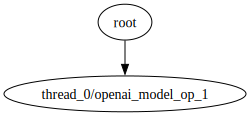

In [37]:
display(graph)